In [18]:
from wsgiref import simple_server
from flask import Flask, request, render_template
from flask import Response
import os
from flask_cors import CORS, cross_origin
from prediction_Validation_Insertion import pred_validation
from trainingModel import trainModel
from training_Validation_Insertion import train_validation
import flask_monitoringdashboard as dashboard
from predictFromModel import prediction

In [19]:
# training_Validation_Insertion.py

from datetime import datetime
from Training_Raw_data_validation.rawValidation import Raw_Data_validation
from DataTypeValidation_Insertion_Training.DataTypeValidation import dBOperation
from DataTransform_Training.DataTransformation import dataTransform
from application_logging import logger

class train_validation:
    def __init__(self,path):
        self.raw_data = Raw_Data_validation(path)
        self.dataTransform = dataTransform()
        self.dBOperation = dBOperation()
        self.file_object = open("Training_Logs/Training_Main_Log.txt", 'a+')
        self.log_writer = logger.App_Logger()

    def train_validation(self):
        try:
            self.log_writer.log(self.file_object, 'Start of Validation on files!!')
            # extracting values from prediction schema
            LengthOfDateStampInFile, LengthOfTimeStampInFile, column_names, noofcolumns = self.raw_data.valuesFromSchema()
            # getting the regex defined to validate filename
            regex = self.raw_data.manualRegexCreation()
            # validating filename of prediction files
            self.raw_data.validationFileNameRaw(regex, LengthOfDateStampInFile, LengthOfTimeStampInFile)
            # validating column length in the file
            self.raw_data.validateColumnLength(noofcolumns)
            # validating if any column has all values missing
            self.raw_data.validateMissingValuesInWholeColumn()
            self.log_writer.log(self.file_object, "Raw Data Validation Complete!!")

            self.log_writer.log(self.file_object, "Starting Data Transforamtion!!")
            # replacing blanks in the csv file with "Null" values to insert in table
            self.dataTransform.replaceMissingWithNull()

            self.log_writer.log(self.file_object, "DataTransformation Completed!!!")

            self.log_writer.log(self.file_object,
                                "Creating Training_Database and tables on the basis of given schema!!!")
            # create database with given name, if present open the connection! Create table with columns given in schema
            self.dBOperation.createTableDb('Training', column_names)
            self.log_writer.log(self.file_object, "Table creation Completed!!")
            self.log_writer.log(self.file_object, "Insertion of Data into Table started!!!!")
            # insert csv files in the table
            self.dBOperation.insertIntoTableGoodData('Training')
            self.log_writer.log(self.file_object, "Insertion in Table completed!!!")
            self.log_writer.log(self.file_object, "Deleting Good Data Folder!!!")
            # Delete the good data folder after loading files in table
            self.raw_data.deleteExistingGoodDataTrainingFolder()
            self.log_writer.log(self.file_object, "Good_Data folder deleted!!!")
            self.log_writer.log(self.file_object, "Moving bad files to Archive and deleting Bad_Data folder!!!")
            # Move the bad files to archive folder
            self.raw_data.moveBadFilesToArchiveBad()
            self.log_writer.log(self.file_object, "Bad files moved to archive!! Bad folder Deleted!!")
            self.log_writer.log(self.file_object, "Validation Operation completed!!")
            self.log_writer.log(self.file_object, "Extracting csv file from table")
            # export data in table to csvfile
            self.dBOperation.selectingDatafromtableintocsv('Training')
            self.file_object.close()

        except Exception as e:
            raise e

In [20]:
# logger.py
from datetime import datetime


class App_Logger:
    def __init__(self):
        pass

    def log(self, file_object, log_message):
        self.now = datetime.now()
        self.date = self.now.date()
        self.current_time = self.now.strftime("%H:%M:%S")
        file_object.write(
            str(self.date) + "/" + str(self.current_time) + "\t\t" + log_message +"\n")


In [25]:
path = 'Training_Batch_Files'

train_valObj = train_validation(path) #object initialization

train_valObj.train_validation()

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.972, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.958, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.958, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.958, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.958, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.972, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.958, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.958, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.958, total=   0.6s


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed: 11.9min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.972, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.958, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.958, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.958, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.958, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.972, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.958, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.958, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.958, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_es

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   55.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.923, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.846, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.917, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.917, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.917, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.923, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.846, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.917, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.917, total=   0.3s


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.846, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.917, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.917, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.917, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.923, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.846, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.917, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.917, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.917, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=100 
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=100, score=0.923

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   37.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.963, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.963, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.963, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.889, total=   0.1s
[CV] learning_rate=0.5, max_depth=3, n_estimators=10 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=10, score=0.926, total=   0.2s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.963, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.963, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.963, total=   0.3s
[CV] learning_rate=0.5, max_depth=3, n_estimators=50 .................
[CV]  learning_rate=0.5, max_depth=3, n_estimators=50, score=0.926, total=   0.3s


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  3.8min finished


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.963, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.963, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.963, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.926, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=10 .


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=10, score=0.926, total=   0.1s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.963, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.963, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.963, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.926, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_estimators=50 .
[CV]  criterion=gini, max_depth=2, max_features=auto, n_estimators=50, score=0.926, total=   0.2s
[CV] criterion=gini, max_depth=2, max_features=auto, n_es

[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:   45.4s finished


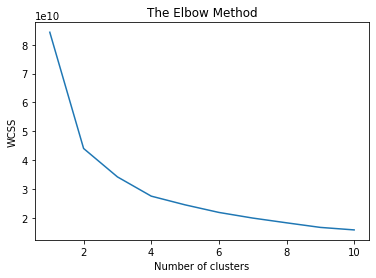

In [27]:
trainModelObj = trainModel() #object initialization
trainModelObj.trainingModel()

In [28]:
path = 'Prediction_Batch_files'

pred_val = pred_validation(path) #object initialization

pred_val.prediction_validation() #calling the prediction_validation function

pred = prediction(path) #object initialization

# predicting for dataset present in database
path,json_predictions = pred.predictionFromModel()

In [32]:
print("Prediction File created at - "  +str(path) +' and few of the predictions are '+str(json_predictions) )

Prediction File created at - Prediction_Output_File/Predictions.csv and few of the predictions are [{"Wafer":1208.0,"Prediction":-1},{"Wafer":1209.0,"Prediction":-1},{"Wafer":1213.0,"Prediction":-1},{"Wafer":1214.0,"Prediction":-1},{"Wafer":1219.0,"Prediction":-1}]
